# STATISTICS

# Models comparison

Libraries:
- pandas
- numpy
- scipy
- sklearn
- statsmodels
- matplotlib

### 1. Diamonds price predictions

There is data on the cost and size of 53,940 diamonds:

In [1]:
import pandas as pd
data = pd.read_csv('diamonds.txt', sep='\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


We will fit two regression models on the training set: _LinearRegression_ and _RandomForestRegressor_ without any parameters and compare, which model better predicts the price of diamonds.

In [2]:
X_pd = data.drop(['price'], axis=1)
y_pd = data['price']
X = X_pd.values  # to numpy
y = y_pd.values

In [3]:
from sklearn import model_selection, tree, metrics, ensemble

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1)

In [5]:
RF_model = ensemble.RandomForestRegressor(random_state = 1)
RF_model.fit(X_train, y_train)

/Users/nadia/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [6]:
y_pred_RF = RF_model.predict(X_test)

In [7]:
# absolute deviations of predictions from true prices:
RF_error = abs(y_pred_RF - y_test)
RF_error.mean()

802.9205172724115

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred_LR = LR_model.predict(X_test)

In [11]:
LR_error = abs(y_pred_LR - y_test)
LR_error.mean()

890.3764004285669

H0: the quality of RF and LR is the same  (RF_error = LR_error)

H1: the quality of RF and LR is different (RF_error != LR_error)

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 'LR')

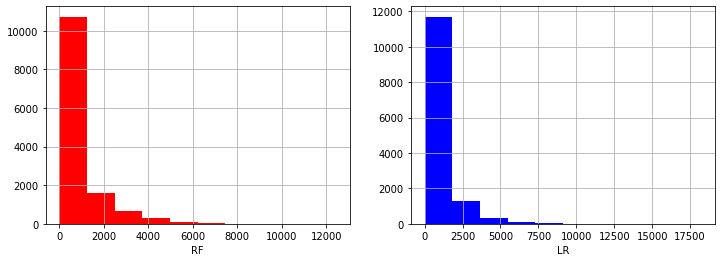

In [12]:
%pylab inline
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(RF_error, color = 'r')
pylab.xlabel('RF')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(LR_error, color = 'b')
pylab.xlabel('LR')

**t-statistics**

In [13]:
from scipy import stats

In [14]:
stats.ttest_rel(RF_error, LR_error) 

Ttest_relResult(statistic=-13.017729783879593, pvalue=1.6551745751192542e-38)

p-value < 0.05, H0 is rejected, then we can say the cuality of models is different.

Confident interval for difference in predictions of models:

In [15]:
from statsmodels.stats.weightstats import *

In [16]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(RF_error - LR_error).tconfint_mean())

95% confidence interval: [-100.624521, -74.287245]


It turns out that a random forest predicts diamond prices on average by $ 70-100 more accurately.

### 2. Banknotes fake prediction

There are measurements of 200 thousand-Swiss banknotes were in circulation in the first half of the XX century. One hundred of the banknotes were real and one hundred were fake. The figure below shows the measured signs:

In [17]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

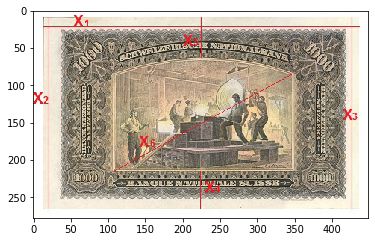

In [18]:
img = imread('money.jpg')
plt.imshow(img)

In [19]:
import pandas as pd
data = pd.read_csv('banknotes.txt', sep='\t')
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [20]:
data.describe()

,X1,X2,X3,X4,X5,X6,real
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500,0.500000
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266,0.501255
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000,0.000000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000,0.000000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000,0.500000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000,1.000000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000,1.000000


We will compare two classifiers, using _LogisticRegression:_ first one fits on X1, X2, X3 features, and second one, on X4, X5, X6 features.

In [21]:
y_pd = data['real']
X1_pd = data[['X1','X2','X3']]
X2_pd = data[['X4','X5','X6']]
X1 = X1_pd.values
X2 = X2_pd.values
y = y_pd.values

Let's reserve 50 random objects for a test sample, and on the remaining 150, configure two banknote counterfeit classifiers:

In [22]:
from sklearn import model_selection, metrics

In [23]:
X1_train, X1_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size = 0.25, random_state = 1)
X2_train, X2_test, y_train, y_test = model_selection.train_test_split(X2, y, test_size = 0.25, random_state = 1)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
LR1 = LogisticRegression()
LR1.fit(X1_train, y_train)

/Users/nadia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y1_pred = LR1.predict(X1_test)
metrics.precision_score(y_test, y1_pred)

0.8695652173913043

In [27]:
LR2 = LogisticRegression()
LR2.fit(X2_train, y_train)

/Users/nadia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y2_pred = LR2.predict(X2_test)
metrics.precision_score(y_test, y2_pred)

0.9642857142857143

H0: the quality of LR1 and LR2 is the same (precision LR1 = precision LR2)

H1: the quality of LR1 and LR2 is different (precision LR1 != precision LR2)

In [29]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [30]:
import numpy as np
Z = proportions_diff_z_stat_rel(y1_pred, y2_pred)

In [31]:
from scipy import stats
# H1: LR1 = LR2
# 'two-sided' 

2 * (1 - stats.norm.cdf(abs(Z)))

0.12282264810139254

In [32]:
#'less':
# H1: pres_LR1 < pres_LR2

stats.norm.cdf(Z)

0.06141132405069629

In both cases, p-value > 0.05, then we can't reject hipothesis H0. In other words, there is no significant difference in classifiers quality. However, we could reject H0 on the level alfa = 0.1.

Let's calculate the 95% confidence interval for the difference in errors of the two classifiers.

In [33]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [34]:
proportions_diff_confint_rel(y1_pred, y2_pred)

(-0.22702018362022364, 0.027020183620223626)

The interval contains zero which confirms H0 about no difference between classifiers.